The following notebook is used for visualization of the logistic regression model.

In [3]:
# imports
import os
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [4]:
# Retrieve All files in folder
folder_path = "LabelsAndPredicted/10K/"
all_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

In [14]:
# Male = 1, Female = 0
def parse_file(file_path:str):
    with open(file_path, 'r') as f:
        data = []
        for line in f:
            data.append(line.replace('\n','').split(','))
    y_act, y_prd = list(zip(*data))
    y_act = [int(float(val)) for val in y_act[1:]]
    y_prd = [int(val) for val in y_prd[1:]]
    return y_act,y_prd

def plot_confusion_matrix(y_act, y_prd, title="", normalize = True, save_location = None):
    cm = confusion_matrix(y_act, y_prd)
    cm = cm / np.sum(cm) if normalize else cm
    cmDF = pd.DataFrame(cm)
    plt.matshow(cmDF, cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(cmDF.columns))
    plt.xticks(tick_marks, ["Female", "Male"])
    plt.yticks(tick_marks, ["Female", "Male"])
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.title(title, y = 1.1)
    
    # annotate data - code snippet from scikit doc
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    plt.savefig(f"Plots-CM/{title.replace(' ', '-')}")

def get_accuracies(y_act, y_prd):
    acc = {"male":0,"female":0}
    male_count = y_act.count(1)
    female_count = y_act.count(0)
    for act, prd in zip(y_act, y_prd):
        if act == prd:
            if act == 1:
                acc["male"] += 1
            else:
                acc["female"] += 1
    acc["male"] /= male_count
    acc["female"] /= female_count
    return acc
        
def plot_bar_charts(gender_data, fig_name):
    keys = list(gender_data.keys())
    males = []
    females = []
    for key in keys:
        males.append(gender_data[key]["male"]*100)
        females.append(gender_data[key]["female"]*100)
    data = [males,females]

    barWidth = 0.4
    r1 = np.arange(len(males))
    r2 = [x + barWidth for x in r1]
    
    plt.bar(r1, males, color='c', width=barWidth, edgecolor='white', 
        label='Males')
    plt.bar(r2, females, color='m', width=barWidth, edgecolor='white', 
        label='Females')
    
    plt.xticks([r + barWidth/2 for r in range(len(keys))], keys, rotation = 90)
    plt.ylim(0,100)
    plt.ylabel("Accuracy (%)")
    plt.grid(alpha = 200)
#     plt.title("Comparing Accuracies Between Various Features")
    plt.legend()
    plt.savefig(fig_name, dpi=300, bbox_inches = 'tight')

def get_overall_accuracies(y_act, y_prd):
    correct_prd = 0
    for act, prd in zip(y_act, y_prd):
        if act == prd:
            correct_prd += 1
    correct_prd /= len(y_act)
    return correct_prd
    
def plot_overall_acc_chart(gender_data,fig_name):
    keys = list(gender_data.keys())
    data = []
    for key in keys:
        data.append(gender_data[key]*100)
    barWidth = 0.8
    plt.bar(keys, data, color='c', width=barWidth, edgecolor='white')
    plt.xticks(keys, rotation = 90)
    plt.ylim(0,100)
    plt.ylabel("Accuracy (%)")
    plt.grid(alpha = 200)
#     plt.title("Comparing Overall Accuracies Between Various Features")
    plt.savefig(fig_name, dpi=600, bbox_inches = 'tight')

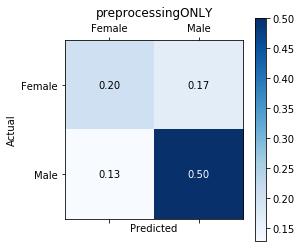

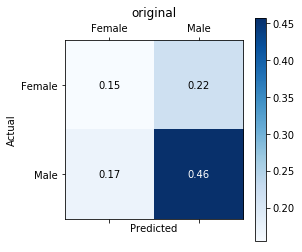

In [13]:
models = dict()
overall_acc = dict()
for f in all_files:
    y_act, y_prd = parse_file(folder_path + f)
    title = f.replace('.csv','').split('-')
    if title[1] == 'test':
        title = ' '.join(title[2:])
        title_abbrev = '-'.join([word[0].upper() for word in title.split(' ')])
        models[title_abbrev] = get_accuracies(y_act, y_prd)
        overall_acc[title_abbrev] = get_overall_accuracies(y_act, y_prd)
        plot_confusion_matrix(y_act, y_prd, title, normalize = True)


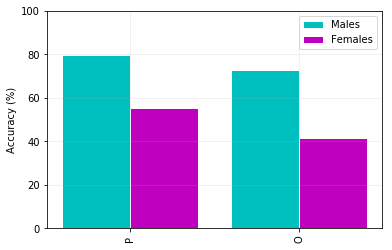

In [15]:
sorted_models = dict(sorted(models.items(), key = lambda x: x[1]["male"], reverse = True))
plot_bar_charts(sorted_models, "comparing-og-vs-pp")

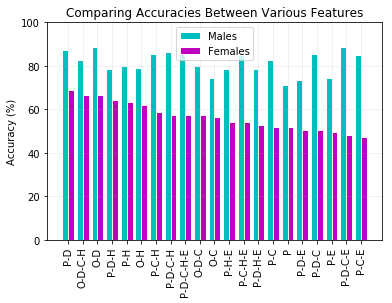

In [57]:
sorted_models_fe = dict(sorted(models.items(), key = lambda x: x[1]["female"], reverse = True))
plot_bar_charts(sorted_models_fe, "all-accuracies-female-sorted")

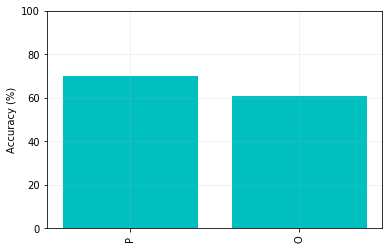

In [16]:
srtd_ovrl_acc = dict(sorted(overall_acc.items(), key = lambda x: x[1], reverse = True))
plot_overall_acc_chart(srtd_ovrl_acc, "overall-acc-pp-vs-og")